Load a random vector with the divide-and-conquer state preparation.

In [2]:
%pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 37.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.2.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pbr-6.0.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.5 MB/s eta 0:00:00a 0:00:01
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.7 MB/s eta 0:00:00a 0:00:01
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 47.3 MB/s eta 0:00:0000:0100:01
Using cached stevedore-5.2.0-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 42.6 MB/s eta 0:00:00

In [2]:
import numpy as np
from encoding import Encoding
from qiskit import Aer, ClassicalRegister, execute, visualization

ImportError: cannot import name 'Aer' from 'qiskit' (/Users/charles/Documents/dcsp/quantumdc_env/lib/python3.12/site-packages/qiskit/__init__.py)

In [2]:
input_vector = 2*np.random.rand(16)-1
input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2

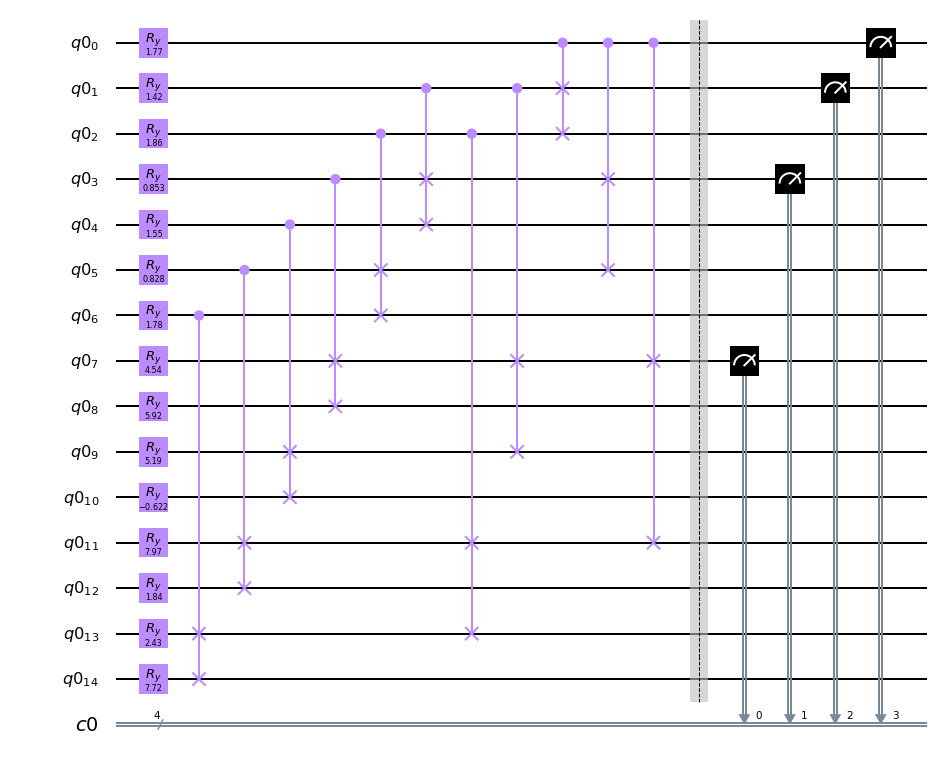

In [3]:
encode = Encoding(input_vector, 'dc_amplitude_encoding')
output = ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()

for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')

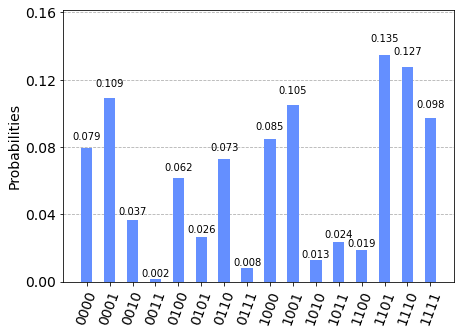

In [4]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 10000
job = execute(circuit, backend_sim, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [5]:
expected_probabilities

array([0.07868718, 0.11186685, 0.03808094, 0.0012488 , 0.0638148 ,
       0.02388018, 0.07580074, 0.00783114, 0.07965269, 0.1000396 ,
       0.01273044, 0.02192747, 0.01842706, 0.1330799 , 0.13244741,
       0.10048482])